In [3]:
# Create a twitter connection using TwitterAPI:
# https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI
def get_twitter(config_file):
    """Read the config_file and construct an instance of TwitterAPI.
    Args:
        config_file ... A config file in configParser format with Twitter credentials
        Returns:
            An instance of TwitterAPI."""
    config = configparser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
        config.get('twitter','consumer_key'),
        config.get('twitter','consumer_secret'),
        config.get('twitter','access_token'),
        config.get('twitter','access_token_secret'),
    )
    return twitter
twitter = get_twitter('twitter.cfg')
print('Established Twitter connection.')

Established Twitter connection.


In [4]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [4]:
# What can we do with this twitter object?
# builtin method `dir` tells us..
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [5]:
# Get help on the `request` method using the builtin method called... `help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [6]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'})

In [7]:
# What object is returned?
# builtin type method will tell us.
print(type(request))

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


In [8]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [9]:
for i in [1,2,3]:
    print(i)

1
2
3


In [10]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [11]:
# The _iter_ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See
# https://docs.python.org/2/tutorial/datastructures.html

In [12]:
print('found %d tweets' % len(tweets))

found 12 tweets


In [13]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [14]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [15]:
# Print keys.
a_tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [16]:
# The test.
print(a_tweet['text'])
print(a_tweet['created_at'])

Nickel Plate Road 765 The Joliet Rocket to Chicago Metra train LaSalle Street Station HD https://t.co/YnIsT558GQ
Tue Sep 05 02:18:49 +0000 2017


In [17]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Wed Oct 28 17:38:48 +0000 2009',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Originally frm Oregon, living in NH looking for original family in SW Washington State.American Red Cross Disaster Services since 1978.WillametteRR@facebook',
 'entities': {'description': {'urls': []}},
 'favourites_count': 32,
 'follow_request_sent': False,
 'followers_count': 45,
 'following': False,
 'friends_count': 286,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 85868378,
 'id_str': '85868378',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 19,
 'location': 'Nashua, NH',
 'name': 'Jerry  Kramer',
 'notifications': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': Fals

In [18]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=JKramer328, name=Jerry  Kramer, location=Nashua, NH


In [19]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count': 200})
followers = [r for r in request]

print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timeline

found 44 followers for JKramer328


In [20]:
type(followers[0])

dict

In [21]:
followers[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'live_following', 'follow_request_sent', 'notifications', 'muting', 'blocking', 'blocked_by', 'translator_type'])

In [22]:
followers[0]['screen_name']

'clan95'

In [23]:
# What happens if we het an error
request = twitter.request('followers/list',
                         {'screen_name': 'this_is_not_a_valid_screen_name',
                         'count':200})

In [24]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [25]:
request.status_code

404

In [26]:
#### Limitations
# Can only search 2 weeks in past but can get upto 3200 most recent tweets of a user
# Rate limits! e.g 180 request in 15 minute window.
# https://dev.twitter.com/docs/rate-limiting/1.1/limits


In [27]:
# Working around rate limits.
def robust_request(twitter, resources, params, max_tries=5):
    """If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
        twitter ..... A TwitterAPI object.
        resources ... A reqource string to request.
        params ...... A parameter dictionary for the request.
        max_tries ... The maximum number of triws to attempt.
    Return:
        A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % requesy.text)
            time.sleep(61*15)

In [28]:
# Drawing graphs with NetworkX
import warnings
warnings.filterwarnings("ignore")
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [29]:
# Didn't draw anything? Need to place it inline
import matplotlib.pyplot as plt
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

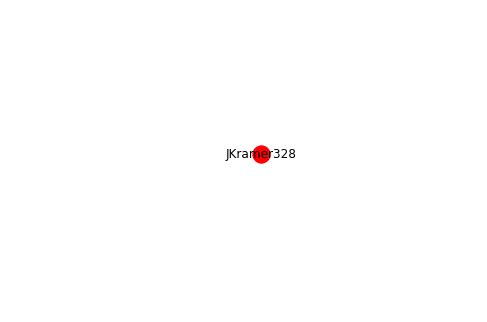

In [30]:
nx.draw(graph, with_labels=True)

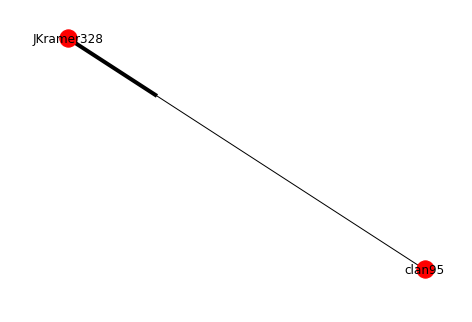

In [31]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

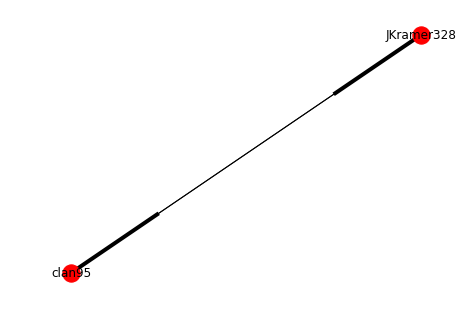

In [32]:
# Make link symmetric
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [33]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 200 tweets for user JKramer328


In [34]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

Nickel Plate Road 765 The Joliet Rocket to Chicago Metra train LaSalle Street Station HD https://t.co/YnIsT558GQ
That's somebody stupid driving that car..hope they pay for damages to the locomotive. https://t.co/AOTPEBhjqm
https://t.co/vYB7Z4Owq4
Hurricane Irma Strengthens to a Category 4; Hurricane Warnings Issued for Leeward Islands, Hurricane Watch... https://t.co/z3uVuszNmX
Infidel Angela🇺🇸 on Twitter https://t.co/6525JYY0F2
Latest Trump Move Puts An End To Welfare Leeches | The Black Sphere with Kevin Jackson | https://t.co/EGzvCxErIX https://t.co/P1q612EWqp
The https://t.co/piokoqYniW
Political Cartoons on Twitter https://t.co/F6mFboI3kP
BenGarrison Cartoons on Twitter https://t.co/05ojvosg8q
https://t.co/qreHJ5zcuM
https://t.co/vXfUCHvTjm
Political Cartoons on Twitter https://t.co/zpGh1yXsEA
Bnei Brak’s ‘Coca Cola Bridge’ Collapses on Truck Passing Beneath https://t.co/mFraXA6o9J
Bnei Brak’s ‘Coca Cola Bridge’ Collapses on Truck Passing Beneath https://t.co/mFraXA6o9J via @Jewis

In [35]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.

In [36]:
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [37]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespaces
print('founf %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

founf 440 unique terms in 200 tweets


[('the', 13),
 ('to', 11),
 ('on', 9),
 ('for', 6),
 ('twitter', 5),
 ('after', 5),
 ('-', 5),
 ('daily', 5),
 ('caller', 5),
 ('|', 4)]

In [38]:
list(counts.keys())[0]

'nickel'

In [39]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [59]:
sorted([('joe', 10), ('mary', 20), ('jim',15), ('joe', 5)],
      key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [41]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1])
               for item in sorted_counts))

the=13
to=11
on=9
for=6
twitter=5
after=5
-=5
daily=5
caller=5
|=4
in=4
rt=4
hurricane=3
a=3
trump=3
cartoons=3
cnn=3
full=3
panic=3
mode=3
man=3
who=3
incited=3
mob=3
identified=3
call=3
of=3
groups=3
spreading=3
propaganda=3
that=2
puts=2
with=2
political=2
bnei=2
brak’s=2
‘coca=2
cola=2
bridge’=2
collapses=2
truck=2
passing=2
beneath=2
https://t.co/mfraxa6o9j=2
via=2
you=2
being=2
most=2
john=2
legend=2
out=2
casting=2
fat=2
actors=2
play=2
@dailycaller:=2
‘they’re=2
there=2
today’:=2
isis=2
fighters=2
return=2
tunnels=2
5=2
months=2
moab=2
anti-trump=2
‘resistance’=2
north=2
korean=2
nickel=1
plate=1
road=1
765=1
joliet=1
rocket=1
chicago=1
metra=1
train=1
lasalle=1
street=1
station=1
hd=1
https://t.co/ynist558gq=1
that's=1
somebody=1
stupid=1
driving=1
car..hope=1
they=1
pay=1
damages=1
locomotive.=1
https://t.co/aotpebhjqm=1
https://t.co/vyb7z4owq4=1
irma=1
strengthens=1
category=1
4;=1
warnings=1
issued=1
leeward=1
islands,=1
watch...=1
https://t.co/z3uvusznmx=1
infidel=1
angela

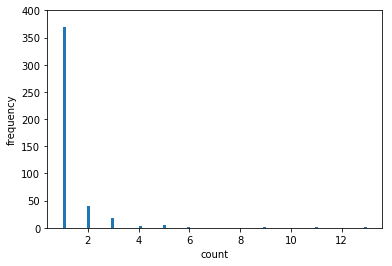

In [50]:
# Plot these counts
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,400))
plt.show()

<b>Zipf's law</b>: (roughly) there are many rare words; there are a small number of extremely frequent words.

Alternatively:
The frequency of a term is inversely proportional to its rank.

Let $f_{i}$ be the frequency of the $i^{th}$ most common term.

$f_{i}\propto\frac{1}{i}$

equivalently
$f_{i} = k*i^b$ for constant $k$ and $b = -1$

In [51]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[13, 11, 9, 6, 5, 5, 5, 5, 5, 4]

In [52]:
ranks = list(range(1, len(freqs)+1))

In [53]:
# Minimize mean squared error to find the best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

In [54]:
# Define the zipf function and fit the k parameter.
def zipfs(i, k):
    return k/i
zipf_parms,covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is %.2f*T^-1' % zipf_parms[0])

Zipf fit is 20.70*T^-1


In [55]:
zipf_parms

array([ 20.70323824])

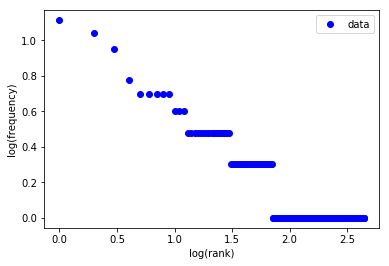

In [56]:
# Try a log-log plot.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.plot(l_ranks, l_freqs, 'ob', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

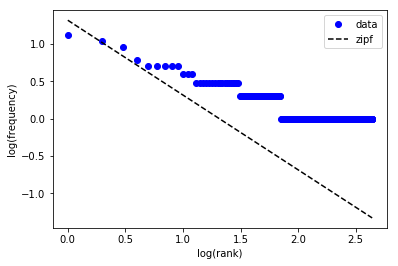

In [57]:
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')
